#Raster Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [146]:
file_name = "/content/drive/MyDrive/Geo-Data/L3-NF45K06-108-056-23nov09-BAND2.tif"

In [147]:
ds = gdal.Open(file_name)

In [148]:
print('File List:', ds.GetFileList())

File List: ['/content/drive/MyDrive/Geo-Data/L3-NF45K06-108-056-23nov09-BAND2.tif']


In [149]:
print(ds.RasterXSize)

1153


In [12]:
print(ds.RasterYSize)

1153


In [93]:
print('Coordinate system:', ds.GetProjection())

Coordinate system: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


ds.GeoTransform() returns a six element tuple: 
longitude of the 0,0 pixel, spatial reolution in x direction, rotation, latitude of y pixel, rotation in y direction, resolution in y direction

In [117]:
gt = ds.GetGeoTransform()
gt

(88.24538750000002, 0.000225, 0.0, 22.754612500000018, 0.0, -0.000225)

With the above geotransform information if you want to calculate the real world co-ordinates of the pixel, that can be done using ApplyGeoTransform () function.

In [118]:
print('Upper Left Corner: ', gdal.ApplyGeoTransform(gt, 0, 0))
print('Lower Left Corner: ', gdal.ApplyGeoTransform(gt, 0, ds.RasterYSize))
print()
print('Upper Right Corner: ', gdal.ApplyGeoTransform(gt, ds.RasterXSize,0))
print('Lower Right Corner: ', gdal.ApplyGeoTransform(gt, ds.RasterXSize, ds.RasterYSize))
print()
print('Center: ', gdal.ApplyGeoTransform(gt, ds.RasterXSize/2, ds.RasterYSize/2))


Upper Left Corner:  [88.24538750000002, 22.754612500000018]
Lower Left Corner:  [88.24538750000002, 22.495187500000018]

Upper Right Corner:  [88.50481250000001, 22.754612500000018]
Lower Right Corner:  [88.50481250000001, 22.495187500000018]

Center:  [88.37510000000002, 22.624900000000018]


Associated Metadata

In [119]:
print('Metadata', ds.GetMetadata())

Metadata {'AREA_OR_POINT': 'Area', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_SOFTWARE': 'ERDAS IMAGINE', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}


Number of bands

In [150]:
ds.RasterCount

1

In [156]:
band = ds.GetRasterBand(1)
band.ComputeBandStats(False)

(57.57546247994409, 3.472653519003903)

In [157]:
data = band.ReadAsArray()
print(data)

[[68 65 63 ... 56 57 56]
 [65 62 61 ... 57 56 54]
 [57 57 55 ... 55 54 55]
 ...
 [56 55 57 ... 60 58 58]
 [57 55 55 ... 63 60 58]
 [55 54 54 ... 61 57 57]]


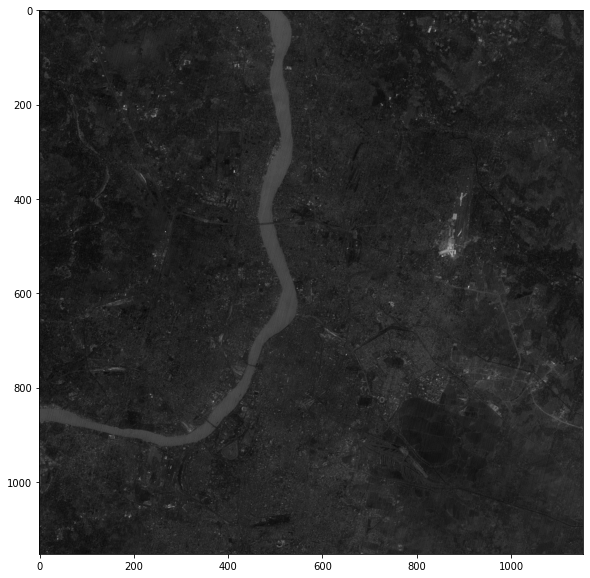

In [159]:
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')